In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [56]:
data_gen = ImageDataGenerator(rescale = 1./255,)

In [57]:
path = 'D:\Project-VSCode\Identify-Emotions\dataset\Train'
train_datasset = data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    subset = 'training',
    class_mode = 'categorical'
)

Found 28821 images belonging to 7 classes.


In [58]:
train_datasset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [59]:
path = 'D:\Project-VSCode\Identify-Emotions\dataset\Validation'
validation_datasset = data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical'
)

Found 7066 images belonging to 7 classes.


In [60]:
validation_datasset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [61]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(48,48,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=7,activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,159 (856.09 KB)

 Trainable params: 219,159 (856.09 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [64]:
hist = model.fit(train_datasset,epochs=100,batch_size=64,steps_per_epoch=100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2052 - loss: 1.8704
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2228 - loss: 1.8379
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2592 - loss: 1.7914
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2927 - loss: 1.7337
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3383 - loss: 1.6735
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3518 - loss: 1.6252
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3967 - loss: 1.5513
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3801 - loss: 1.5629
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4244 - loss: 1.4687
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.3750 - loss: 0.7589
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4388 - loss: 1.4688
Epoch 12/100
100/100 ━━━━━━━━

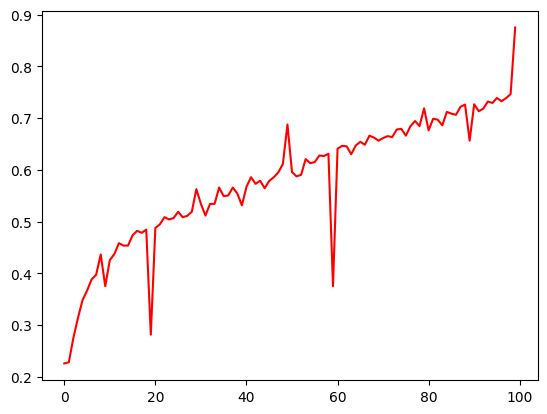

In [65]:
plt.plot(hist.history['accuracy'],color='r')
plt.show()

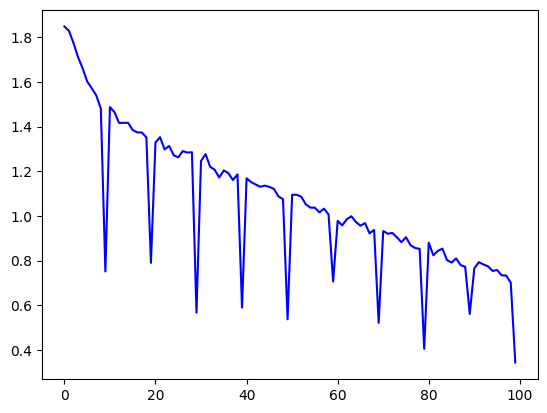

In [66]:
plt.plot(hist.history['loss'],color='b')
plt.show()

In [67]:
# model.save('model-idenfity-emotion.h5')

In [68]:
model.evaluate(validation_datasset)

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5011 - loss: 1.6115


[1.6200913190841675, 0.5032550096511841]